<a href="https://colab.research.google.com/github/DineshChopra/AI-ML/blob/master/TensorFlow/Udacity/3_FashionMNIST_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
!pip install -U tensorflow_datasets

Requirement already up-to-date: tensorflow_datasets in /usr/local/lib/python3.6/dist-packages (3.2.1)


In [81]:
import tensorflow as tf

In [82]:
#Import tensorflow datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [83]:
# Helper Libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [84]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [85]:
# Import Fashion MNIST dataset
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
print(metadata)

tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=3.0.1,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollgraf},
      title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
                   Algorithms},
      journal   = {CoRR},
      volume

In [86]:
# Split data into training and testing dataset
train_dataset, test_dataset = dataset['train'], dataset['test']

In [87]:
#  Define class names, because dataset contains numeric value i.e. 0,1,2,3,4,5,6,7,8,9
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [88]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of Training examples {}".format(num_train_examples))
print("Number of Test examples {}".format(num_test_examples))

Number of Training examples 60000
Number of Test examples 10000


In [89]:
# Image value is between [0, 255] pixels, To do more accurate prediction we should perform operation between value [0, 1]
# So we define normalization process

def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies each element in the dataset
train_dataset =  train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

In [90]:
# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

In [91]:
# Explore the processed data

for image, label in test_dataset.take(1):
  break

image = image.numpy().reshape((28, 28))

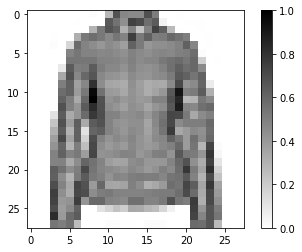

In [92]:
# Plot the image
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

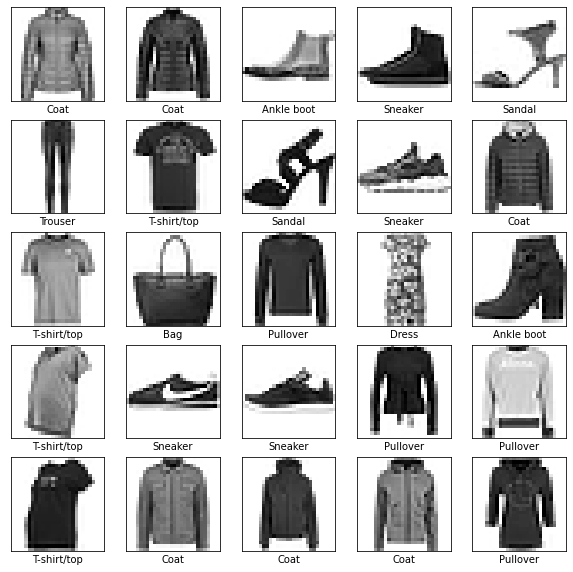

In [93]:
# Display the 25 images from training set and 
# display the class in below each image

plt.figure(figsize=(10, 10))
i = 0

for (image, label) in test_dataset.take(25):
  image = image.numpy().reshape((28, 28))
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
  i += 1

plt.show()

**Build the Model**

In [124]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu, input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Conv2D(62, (3,3), padding='same', activation = tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

Compile the model


In [125]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

Train the Model

In [96]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [127]:
model.fit(train_dataset, 
          epochs=10, 
          steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE)
          )

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1524 - accuracy: 0.9438
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1327 - accuracy: 0.9511
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1098 - accuracy: 0.9604
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0942 - accuracy: 0.9647
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0780 - accuracy: 0.9713
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0677 - accuracy: 0.9750
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0575 - accuracy: 0.9787
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0484 - accuracy: 0.9823
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0448 - accuracy: 0.9835
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0

Evaluate Accuracy

In [98]:
test_loss, test_accuracy = model.evaluate(test_dataset,
                                          steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset: ', test_accuracy)

313/313 [==============================] - 2s 7ms/step - loss: 0.4037 - accuracy: 0.8561
Accuracy on test dataset:  0.8561000227928162


Make Predictions

In [99]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [100]:
predictions.shape

(32, 10)

In [101]:
predictions[0]

array([4.1908296e-03, 5.7999318e-04, 9.5372893e-02, 1.1636026e-03,
       6.2868029e-01, 1.0529275e-04, 2.4926221e-01, 1.0512859e-06,
       1.8670481e-02, 1.9733310e-03], dtype=float32)

In [102]:
np.argmax(predictions[0])

4

In [103]:
test_labels[0]

4

In [104]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

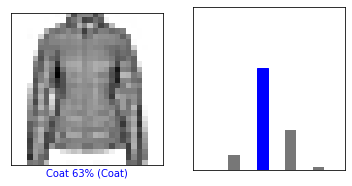

In [105]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

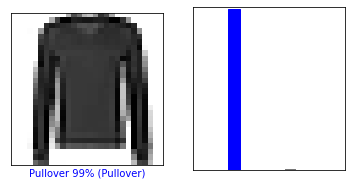

In [106]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

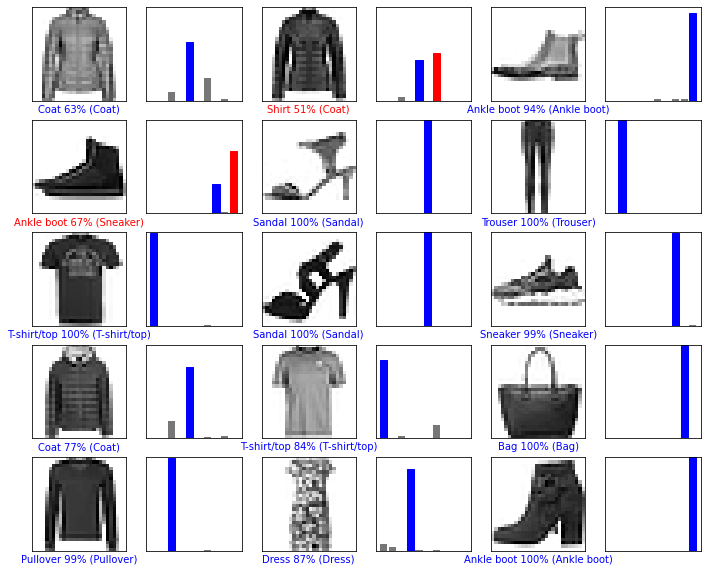

In [107]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [108]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [109]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


Now Predict the image


In [110]:
predictions_single = model.predict(img)

print(predictions_single)

[[4.1908263e-03 5.7999458e-04 9.5372625e-02 1.1636022e-03 6.2868094e-01
  1.0529265e-04 2.4926187e-01 1.0512891e-06 1.8670475e-02 1.9733331e-03]]


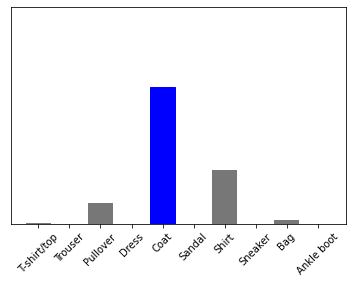

In [111]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [112]:
np.argmax(predictions_single[0])

4